## Logistic regression for a binary classification with a regularization
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Training Data
<hr>

1-1. Load dataset

In [2]:
# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

1-2. Plot the training data

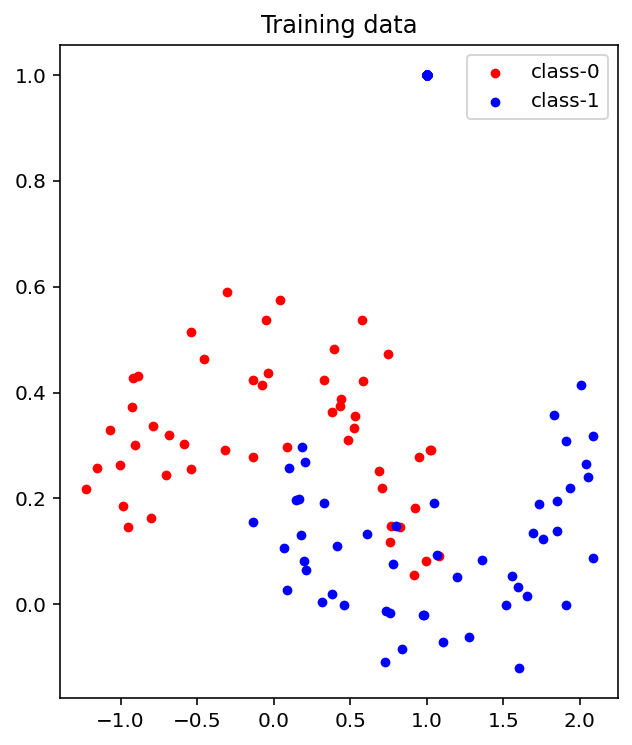

In [3]:
plt.figure(1,figsize=(5,6))
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=60, c='r', marker='.', label='class-0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=60, c='b', marker='.', label='class-1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Testing Data 
<hr>

2-1. Load dataset

In [4]:
# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

2-2. Plot the testing data

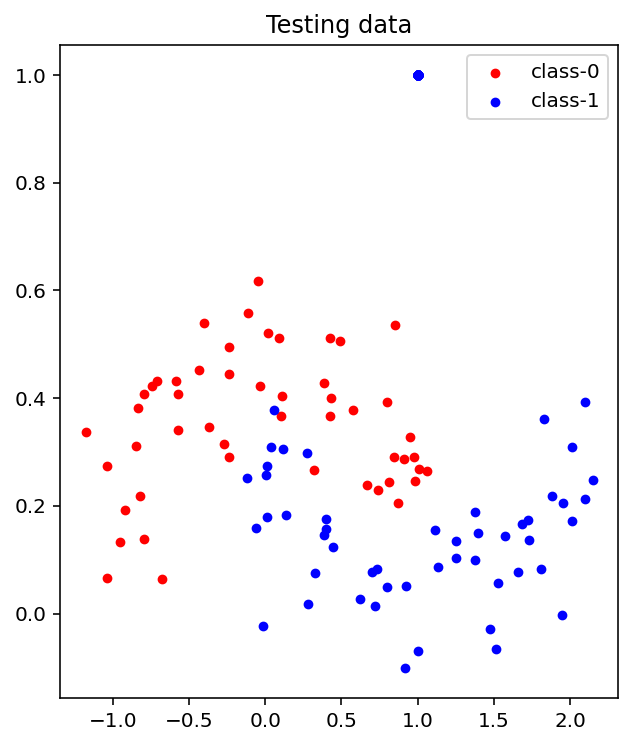

In [5]:
plt.figure(1,figsize=(5,6))
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=60, c='r', marker='.', label='class-0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=60, c='b', marker='.', label='class-1')
plt.title('Testing data')
plt.legend()
plt.show()

## 3. Logistic regression with a high dimensional feature function
<hr>

3-1. Sigmoid/logistic function
<hr>

$$
\sigma(\eta) = \frac{1}{1 + \exp^{-\eta}}
$$

In [6]:
def sigmoid(z):
    
    sigmoid_f = 1 / (1 + np.exp(-z))
    
    return sigmoid_f 

3-2 .define a prediction function
<hr>

$$
\begin{aligned}
z &= g(x, y;\theta)
\end{aligned}
$$

In [42]:
list = []
for i in range(100) :
    list.append(random())

w_init = np.array(list)

print(w_init.shape)
print(w_init)

(100,)
[4.37013883e-03 2.18924774e-01 4.30166313e-01 1.91219727e-01
 1.94540340e-01 3.70937053e-01 7.07800586e-01 1.90470167e-01
 2.95348453e-01 7.80999835e-01 2.14746611e-01 4.98462377e-01
 6.38250866e-01 7.04373625e-01 9.01505130e-01 5.31127852e-01
 2.34179885e-01 8.92480253e-01 7.82994404e-01 8.28986719e-01
 2.04880747e-01 7.88063139e-01 9.22533548e-01 7.90035935e-01
 3.04734711e-01 1.47234118e-01 7.45056048e-01 8.73089976e-01
 1.28298623e-02 1.84515328e-01 6.10138021e-01 4.41912109e-01
 4.96541692e-01 6.76698790e-02 1.65126156e-02 2.12230099e-01
 1.03939441e-03 6.75487859e-02 6.35481542e-01 8.70869736e-01
 8.58142216e-01 9.39006871e-01 5.74602338e-01 6.77914950e-01
 5.46580050e-01 9.00572009e-01 2.88792931e-01 2.27862275e-01
 2.36414625e-01 6.88986096e-01 4.80034969e-01 3.75183660e-01
 6.56396668e-01 9.66224780e-01 1.37599924e-01 6.22767641e-01
 9.46881945e-01 4.32995151e-01 2.83729720e-01 1.24466071e-02
 1.45625323e-01 4.96513022e-01 7.80181839e-01 7.81115603e-01
 7.03050471e-01 7

In [49]:
from random import *

print(number_data_train)
print(number_data_test)

def featureFunction(x, n):
    
    result = np.ones([n, 10])
    
    result[:, 0] = 1
    result[:, 1] = x
    result[:, 2] = x ** 2
    result[:, 3] = x ** 3
    result[:, 4] = x ** 4
    result[:, 5] = x ** 5
    result[:, 6] = x ** 6
    result[:, 7] = x ** 7
    result[:, 8] = x ** 8
    result[:, 9] = x ** 9
    
    return result


def f_pred(x, y, w):
    
    n = len(y)
    result = np.zeros([n, 1])
    m = x.shape[1]
    
    for i in range(n):
        sum = 0
        for j in range(m):
            for k in range(m):
                sum += w[10 * j + k] * x[i, j] * y[i, k]
                
        result[i] = sigmoid(sum)
    
    return result

fx1_train = featureFunction(x1_train, number_data_train)
fx2_train = featureFunction(x2_train, number_data_train)

z_train = f_pred(fx1_train, fx2_train, w_init)

200
200


## 4. Objective Function with a regularization term
<hr>

4-1. define objective function

In [50]:
def loss_func(y_pred, y, lamda, w):
    n = len(y)
    epsilon = 1e-3
    loss = np.dot(-(y.T), np.log(y_pred + epsilon)) - np.dot((1-y).T, np.log(1 - y_pred + epsilon))
    return loss / n + (lamda / 2) * (np.dot(w.T, w))


y_train = data_train[:,2][:,None] # label
print(loss_func(z_train, y_train, 0.001 ,w_init))

[[0.45969388]]


4-2. define gradient of objective funtion

In [52]:
def grad_loss(y_pred, y, x1, x2, lamda, w):
    n = len(y)
    result = np.zeros([n, 1])
    m = x1.shape[1]
    
    for i in range(n):
        sum = 0
        for j in range(m):
            for k in range(m):
                sum += x1[i, j] * x2[i, k]
                
        result[i] = sum
    
    temp = (np.dot(result.T, y_pred - y)) / n
    return (temp + lamda * w).reshape(100, -1)

print(grad_loss(z_train, y_train, fx1_train, fx2_train, 0.001, w_init).shape)

(100, 1)


## 5. Gradient Descent
<hr>

5-1. define gradient descent function

In [53]:
def grad_desc(x1, x2, y , w_init, tau, lamda, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(x1, x2, w)# linear predicition function   
        grad_f = grad_loss(y_pred, y, x1, x2, lamda, w)# gradient of the loss  
        w = w - tau * grad_f # update rule of gradient descent  
        L_iters[i] = loss_func(y_pred, y, lamda, w) # save the current loss value 
        
    return w, L_iters

## 6. Hyper-parameter
<hr>

6-1. define lamda & learning rate

In [ ]:
lamdas = [1e-1, 1e-2, 1e-3, 1e-1e-5
learning_rate = 

## 7.Training
<hr>

## 8. Compute the training accuray

## 9. Compute the testing accuracy

## Output
<hr>